In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import itertools
%matplotlib inline

In [17]:
cnn1_hist = dict()
cnn1_hist['acc'] = np.genfromtxt('./output/cnn_cat1/run_cnn_cat1_training-tag-acc.csv',delimiter=',')[:,2]
cnn1_hist['val_acc'] = np.genfromtxt('./output/cnn_cat1/run_cnn_cat1_validation-tag-acc.csv',delimiter=',')[:,2]    
cnn1_hist['loss'] = np.genfromtxt('./output/cnn_cat1/run_cnn_cat1_training-tag-loss.csv',delimiter=',')[:,2]    
cnn1_hist['val_loss'] = np.genfromtxt('./output/cnn_cat1/run_cnn_cat1_validation-tag-loss.csv',delimiter=',')[:,2]    

cnn7_hist = dict()
cnn7_hist['acc'] = np.genfromtxt('./output/cnn_cat7/run_cnn_cat7_training-tag-acc.csv',delimiter=',')[:,2]
cnn7_hist['val_acc'] = np.genfromtxt('./output/cnn_cat7/run_cnn_cat7_validation-tag-acc.csv',delimiter=',')[:,2]
cnn7_hist['loss'] = np.genfromtxt('./output/cnn_cat7/run_cnn_cat7_training-tag-loss.csv',delimiter=',')[:,2]    
cnn7_hist['val_loss'] = np.genfromtxt('./output/cnn_cat7/run_cnn_cat7_validation-tag-loss.csv',delimiter=',')[:,2]

cnn12_hist = dict()
cnn12_hist['acc'] = np.genfromtxt('./output/cnn_cat12/run_cnn_cat12_training-tag-acc.csv',delimiter=',')[:,2]
cnn12_hist['val_acc'] = np.genfromtxt('./output/cnn_cat12/run_cnn_cat12_validation-tag-acc.csv',delimiter=',')[:,2]
cnn12_hist['loss'] = np.genfromtxt('./output/cnn_cat12/run_cnn_cat12_training-tag-loss.csv',delimiter=',')[:,2]    
cnn12_hist['val_loss'] = np.genfromtxt('./output/cnn_cat12/run_cnn_cat12_validation-tag-loss.csv',delimiter=',')[:,2]    

with open("./output/cnn_reg7/history.pkl", "rb") as f:
    cnn_reg7_hist = pickle.load(f)

In [4]:
with open("./output/cnn_reg9/history.pkl", "rb") as f:
    cnn9_hist = pickle.load(f)
    
with open("./output/rnn_reg9/history.pkl", "rb") as f:
    rnn9_hist = pickle.load(f)

In [5]:
with open("./output/cnn_reg9/predictions/test/epoch_269-valloss_0.41-valacc_0.72_test.csv", "rb") as f:
    cnn9_preds = np.loadtxt(f, delimiter=",", skiprows=1)

with open("./output/rnn_reg9/predictions/test/epoch_019-valloss_0.35-valacc_0.72_test.csv", "rb") as f:
    rnn9_preds = np.loadtxt(f, delimiter=",", skiprows=1)

# Training history

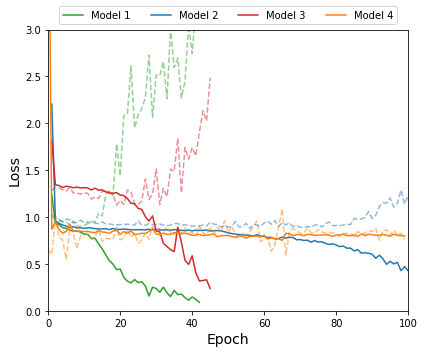

In [19]:
plt.figure(figsize=(6,5))

y = cnn1_hist['loss']
y2 = cnn1_hist['val_loss']
x = range(len(y))
plt.plot(x, y, alpha=1, c='#2ca02c', label='Model 1') # vanilla cnn_cat + downsampling
plt.plot(x, y2, alpha=0.5, c='#2ca02c', ls='--')

y = cnn7_hist['loss']
y2 = cnn7_hist['val_loss']
x = range(len(y))
plt.plot(x, y, alpha=1, c='#1f77b4', label='Model 2') # vanilla cnn_cat
plt.plot(x, y2, alpha=0.5, c='#1f77b4', ls='--')

y = cnn12_hist['loss']
y2 = cnn12_hist['val_loss']
x = range(len(y))
plt.plot(x, y, alpha=1, c='#d62728', label='Model 3') # vanilla cnn_cat + oversampling
plt.plot(x, y2, alpha=0.5, c='#d62728', ls='--')

y = cnn_reg7_hist['loss']
y2 = cnn_reg7_hist['val_loss']
x = range(len(y))
plt.plot(x, y, alpha=1, c='#ff7f0e', label='Model 4') # cnn_reg + oversampling + cropped + batchsize 15
plt.plot(x, y2, alpha=0.5, c='#ff7f0e', ls='--')

plt.xlim(0,100)
plt.ylim(0, 3)
plt.ylabel("Loss", size=14)
plt.xlabel("Epoch", size=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.1), fancybox=True, ncol=4)
plt.tight_layout()
# plt.savefig("./visualizations/example_learning.pdf", bbox_inches='tight')

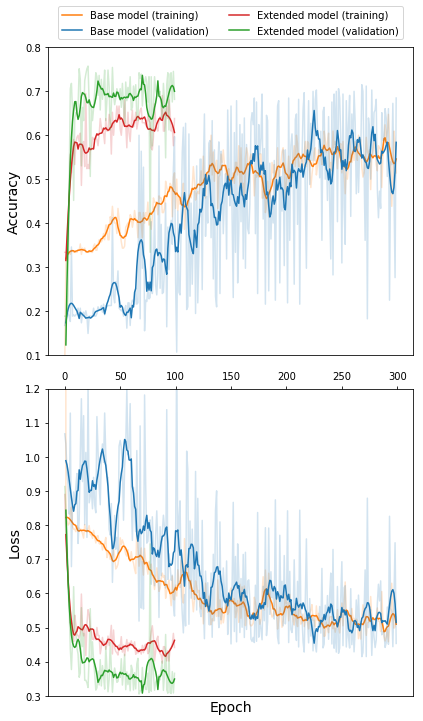

In [27]:
from scipy.signal import savgol_filter

plt.figure(figsize=(6,10))
plt.subplot(2,1,1)

y = cnn9_hist['acc']
y2 = cnn9_hist['val_acc']
x = range(len(y))
y_smooth = savgol_filter(y[1:], 15, 3)
x2 = range(len(y2))
y_smooth2 = savgol_filter(y2[1:], 15, 3)

plt.plot(x, y, alpha=0.2, c='#ff7f0e')
plt.plot(x[1:], y_smooth, c='#ff7f0e', label='Base model (training)')
plt.plot(x2, y2, alpha=0.2, c='#1f77b4')
plt.plot(x2[1:], y_smooth2, c='#1f77b4', label='Base model (validation)')

y = rnn9_hist['acc']
y2 = rnn9_hist['val_acc']
x = range(len(y))
y_smooth = savgol_filter(y[1:], 15, 3)
x2 = range(len(y2))
y_smooth2 = savgol_filter(y2[1:], 15, 3)

plt.plot(x, y, alpha=0.2, c='#d62728')
plt.plot(x[1:], y_smooth, c='#d62728', label='Extended model (training)')
plt.plot(x2, y2, alpha=0.2, c='#2ca02c')
plt.plot(x2[1:], y_smooth2, c='#2ca02c', label='Extended model (validation)')

plt.ylim(0.1, 0.8)
plt.ylabel("Accuracy", size=14)
# plt.xlabel("Epoch")
plt.xticks([])
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.15), fancybox=True, ncol=2)


plt.subplot(2,1,2)

y = cnn9_hist['loss']
y2 = cnn9_hist['val_loss']
x = range(len(y))
y_smooth = savgol_filter(y[1:], 15, 3)
x2 = range(len(y2))
y_smooth2 = savgol_filter(y2[1:], 15, 3)

plt.plot(x, y, alpha=0.2, c='#ff7f0e')
plt.plot(x[1:], y_smooth, c='#ff7f0e', label='Base model (training)')
plt.plot(x2, y2, alpha=0.2, c='#1f77b4')
plt.plot(x2[1:], y_smooth2, c='#1f77b4', label='Base model (validation)')

y = rnn9_hist['loss']
y2 = rnn9_hist['val_loss']
x = range(len(y))
y_smooth = savgol_filter(y[1:], 15, 3)
x2 = range(len(y2))
y_smooth2 = savgol_filter(y2[1:], 15, 3)

plt.plot(x, y, alpha=0.2, c='#d62728')
plt.plot(x[1:], y_smooth, c='#d62728', label='Extended model (training)')
plt.plot(x2, y2, alpha=0.2, c='#2ca02c')
plt.plot(x2[1:], y_smooth2, c='#2ca02c', label='Extended model (validation)')

plt.ylim(0.3, 1.2)
plt.ylabel("Loss", size=14)
plt.xlabel("Epoch", size=14)

plt.tight_layout()
# plt.savefig("./visualizations/learn_base_ext.pdf", bbox_inches='tight')

# Confusion matrices

In [8]:
cnn9_conf = confusion_matrix(y_true=cnn9_preds[:,0], y_pred=cnn9_preds[:,1])
rnn9_conf = confusion_matrix(y_true=rnn9_preds[:,0], y_pred=rnn9_preds[:,1])

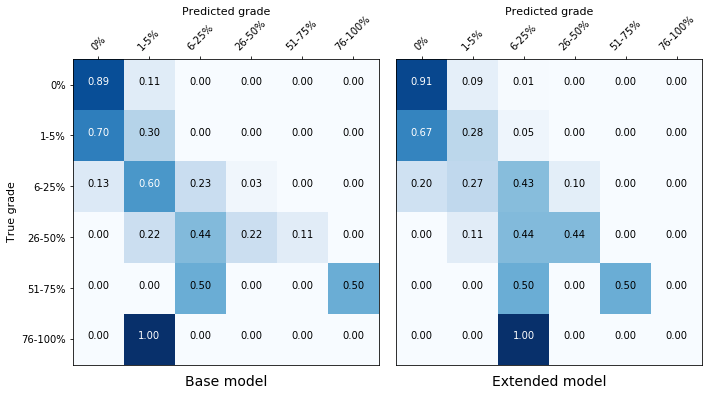

In [22]:
classes = [0,1,2,3,4,5]
normalize = True
cmap = plt.cm.Blues

cm = cnn9_conf.astype('float') / cnn9_conf.sum(axis=1)[:, np.newaxis]
cm2 = rnn9_conf.astype('float') / rnn9_conf.sum(axis=1)[:, np.newaxis]


plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
tick_marks = np.arange(len(classes))
classes = ["0%", "1-5%", "6-25%", "26-50%", "51-75%", "76-100%"]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True grade', size=11)
plt.title('Predicted grade', size=11, pad=44)
plt.xlabel("Base model", size=14, labelpad=10)

plt.subplot(1,2,2)
plt.imshow(cm2, interpolation='nearest', cmap=cmap)
# plt.colorbar()
tick_marks = np.arange(len(classes))
classes = ["0%", "1-5%", "6-25%", "26-50%", "51-75%", "76-100%"]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks([])

fmt = '.2f' if normalize else 'd'
thresh = cm2.max() / 2.
for i, j in itertools.product(range(cm2.shape[0]), range(cm2.shape[1])):
    plt.text(j, i, format(cm2[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm2[i, j] > thresh else "black")

plt.tight_layout()
plt.title('Predicted grade', size=11, pad=44)
plt.xlabel("Extended model", size=14, labelpad=10)

plt.tight_layout()
# plt.savefig("./visualizations/confmat_base_ext.pdf", bbox_inches='tight')

In [10]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

# ROC curves

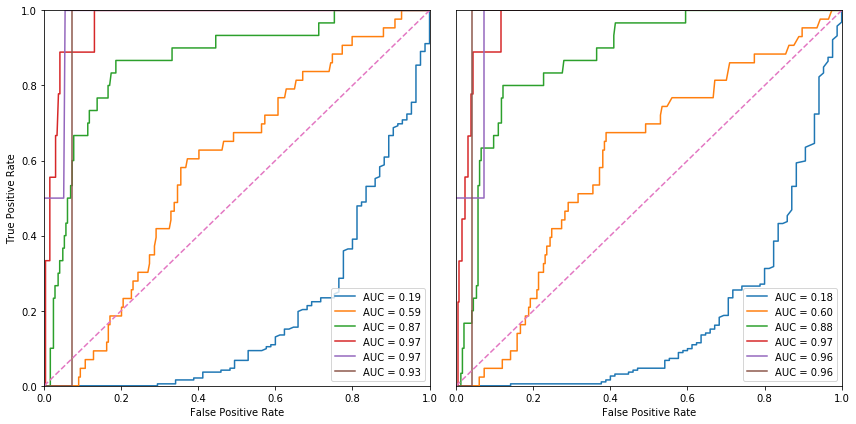

In [11]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
# plt.suptitle('Receiver Operating Characteristic (ROC)')
for i in range(6):
    fpr, tpr, threshold = roc_curve(cnn9_preds[:,0], cnn9_preds[:,2], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(1,2,2)
for i in range(6):
    fpr, tpr, threshold = roc_curve(rnn9_preds[:,0], rnn9_preds[:,2], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.yticks([])
# plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.tight_layout()